In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests 
from citipy import citipy

In [2]:
# Import the API key.
from config import weather_api_key 

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-46.65103383920103 -38.02196233992339
76.02606166723822 -149.89620482948942
-46.58567688715922 -101.84957668505044
35.45638085015918 -175.19994809984155
-69.61302583864192 52.53997281260118
-45.58881502942516 32.511920505565456
-0.7620522018086717 -137.41325909548988
13.886530747256742 73.79390203036493
-71.07528642150713 127.94229332455734
87.60257085137496 1.2284760851713088
68.66605104777432 -112.57453541779083
-68.58724340145585 -87.98684054339776
-79.87455253557454 -130.92211075506626
-0.7136925019036795 -123.9664746127626
29.805050320931116 151.6482861648622
65.97557437567806 -143.66072799388056
-72.48320665190606 -57.05434480598751
-37.20554956248429 33.57410355058198
59.28745460366244 -92.80596798732101
-43.66953143124013 -92.29268146547672
57.60930884024728 18.4865115778924
83.01524484373962 147.15396248495244
-86.53889379259412 -176.6958557850674
79.31996046850907 -19.709319065094206
1.285624132868577 167.0020578521066
-53.72321439168158 -77.67606316486602
-63.08556498539848 

61.87186922815056 173.8429280260138
-26.295349460081532 -31.124116381969884
-49.08987272012881 -41.82841671809808
-52.75735628931337 17.53015230174003
-55.10318436379227 -52.21571723696108
47.76135377198116 179.23562957066895
-23.51343915379863 -63.602825938691126
-4.486018758271527 -89.96238758794306
77.04935581064026 -119.4520348609868
-49.6081914346488 -103.38409068505574
53.613982217902446 -3.618398192343051
-57.443667032238146 -154.14193266899278
12.21644246732825 94.58406887378067
79.56805484738936 -110.99744541539272
-64.46202484560678 12.628911178749377
-27.818290121509627 159.6348499797677
-81.67183031964181 37.889490727449214
-27.249399369954702 82.64938184272665
21.713153226832986 -30.778471239471003
-84.68700500152606 95.63878480297802
-40.04872741059141 15.537234699257823
-71.73591013047071 143.74544166253884
2.4734932511809973 3.307038724600801
-54.03082550472582 -102.95376241305277
-13.184781425934744 99.78821836860851
29.680241382114474 -127.5286342140345
-40.1206745873

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

chuy uy
barrow us
castro cl
kapaa us
east london za
port alfred za
atuona pf
honavar in
new norfolk au
barentsburg sj
yellowknife ca
punta arenas cl
rikitea pf
atuona pf
hasaki jp
fairbanks us
ushuaia ar
umzimvubu za
thompson ca
castro cl
visby se
chokurdakh ru
vaini to
illoqqortoormiut gl
bairiki ki
punta arenas cl
ushuaia ar
rikitea pf
ushuaia ar
shahreza ir
busselton au
butaritari ki
mys shmidta ru
ushuaia ar
port alfred za
atuona pf
rikitea pf
port elizabeth za
illoqqortoormiut gl
lorengau pg
hermanus za
mahebourg mu
westport ie
puerto ayora ec
saskylakh ru
albany au
butaritari ki
mys shmidta ru
rikitea pf
cornelio procopio br
qaanaaq gl
ushuaia ar
cape town za
la ronge ca
jamestown sh
vardo no
esperance au
gamba ga
taolanaro mg
cam ranh vn
mys shmidta ru
karasjok no
baoying cn
amderma ru
mbandaka cd
alice springs au
port alfred za
yar-sale ru
matara lk
bluff nz
ushuaia ar
berlevag no
merauke id
provideniya ru
vaini to
kibala ao
jamestown sh
nikolskoye ru
bluff nz
providencia mx
lo

taolanaro mg
marcona pe
lebu cl
yellowknife ca
anadyr ru
vila velha br
rocha uy
bredasdorp za
ushuaia ar
nikolskoye ru
san ramon de la nueva oran ar
san cristobal ec
norman wells ca
castro cl
rhyl gb
mataura pf
port blair in
yellowknife ca
hermanus za
byron bay au
port elizabeth za
grand river south east mu
ponta do sol cv
albany au
hermanus za
hobart au
yenagoa ng
castro cl
labuhan id
lompoc us
ulladulla au
tumannyy ru
mahebourg mu
saint-philippe re
komsomolskiy ru
ilulissat gl
vaini to
vaini to
port elizabeth za
dzhusaly kz
port alfred za
kodiak us
amderma ru
albany au
ilulissat gl
asau tv
albany au
dwarka in
east london za
punta arenas cl
ust-maya ru
georgetown sh
sitka us
ugoofaaru mv
mataura pf
punta arenas cl
albany au
zhigansk ru
general roca ar
santa luzia br
aquiraz br
longyearbyen sj
geraldton au
richards bay za
tuktoyaktuk ca
ambon id
alta floresta br
torbay ca
bluff nz
yellowknife ca
east london za
victoria sc
castro cl
tsihombe mg
nizhneyansk ru
longyearbyen sj
jamestown s

altay cn
ponta delgada pt
muros es
san patricio mx
rikitea pf
tibana ro
mnogovershinnyy ru
busselton au
umzimvubu za
khatanga ru
muros es
vila do maio cv
busselton au
bambous virieux mu
barrow us
bambous virieux mu
cidreira br
busselton au
vaini to
cape town za
atuona pf
rikitea pf
belushya guba ru
mesto albrechtice cz
provideniya ru
bluff nz
terrace ca
dikson ru
peschanokopskoye ru
tuktoyaktuk ca
bluff nz
sola vu
hobart au
aquiraz br
butaritari ki
faya td
arlit ne
tottori jp


In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
cities

['chuy',
 'barrow',
 'castro',
 'kapaa',
 'east london',
 'port alfred',
 'atuona',
 'honavar',
 'new norfolk',
 'barentsburg',
 'yellowknife',
 'punta arenas',
 'rikitea',
 'hasaki',
 'fairbanks',
 'ushuaia',
 'umzimvubu',
 'thompson',
 'visby',
 'chokurdakh',
 'vaini',
 'illoqqortoormiut',
 'bairiki',
 'shahreza',
 'busselton',
 'butaritari',
 'mys shmidta',
 'port elizabeth',
 'lorengau',
 'hermanus',
 'mahebourg',
 'westport',
 'puerto ayora',
 'saskylakh',
 'albany',
 'cornelio procopio',
 'qaanaaq',
 'cape town',
 'la ronge',
 'jamestown',
 'vardo',
 'esperance',
 'gamba',
 'taolanaro',
 'cam ranh',
 'karasjok',
 'baoying',
 'amderma',
 'mbandaka',
 'alice springs',
 'yar-sale',
 'matara',
 'bluff',
 'berlevag',
 'merauke',
 'provideniya',
 'kibala',
 'nikolskoye',
 'providencia',
 'lompoc',
 'tiznit',
 'levelland',
 'tautira',
 'belushya guba',
 'mariental',
 'saint anthony',
 'san cristobal',
 'bafoulabe',
 'luderitz',
 'vila velha',
 'pangody',
 'mount isa',
 'hilo',
 'san pat

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        print(city_lat)
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the City information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
   # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | chuy
-33.6971
Processing Record 2 of Set 1 | barrow
71.2906
Processing Record 3 of Set 1 | castro
-24.7911
Processing Record 4 of Set 1 | kapaa
22.0752
Processing Record 5 of Set 1 | east london
-33.0153
Processing Record 6 of Set 1 | port alfred
-33.5906
Processing Record 7 of Set 1 | atuona
-9.8
Processing Record 8 of Set 1 | honavar
14.2833
Processing Record 9 of Set 1 | new norfolk
-42.7826
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | yellowknife
62.456
Processing Record 12 of Set 1 | punta arenas
-53.15
Processing Record 13 of Set 1 | rikitea
-23.1203
Processing Record 14 of Set 1 | hasaki
35.7333
Processing Record 15 of Set 1 | fairbanks
64.8378
Processing Record 16 of Set 1 | ushuaia
-54.8
Processing Record 17 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 18 of Set 1 | thompson
55.7435
Processing Record 19 of Set 1 | visby
57.6409
Processing Record 20 of Set 1 | chokurd

70.4692
Processing Record 13 of Set 4 | baykit
61.67
Processing Record 14 of Set 4 | harrison
30.4091
Processing Record 15 of Set 4 | burica
City not found. Skipping...
Processing Record 16 of Set 4 | zhangye
38.9342
Processing Record 17 of Set 4 | temir
49.1414
Processing Record 18 of Set 4 | tuktoyaktuk
69.4541
Processing Record 19 of Set 4 | boda
4.3189
Processing Record 20 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 21 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 22 of Set 4 | conneaut
41.9476
Processing Record 23 of Set 4 | kruisfontein
-34.0033
Processing Record 24 of Set 4 | kensington
-33.9167
Processing Record 25 of Set 4 | plouzane
48.3833
Processing Record 26 of Set 4 | chetpet
13.0717
Processing Record 27 of Set 4 | vanimo
-2.6741
Processing Record 28 of Set 4 | tessalit
20.1986
Processing Record 29 of Set 4 | georgetown
5.4112
Processing Record 30 of Set 4 | beni mazar
28.4962
Processing Record 31 of Set 4 | saldanha
-33.011

40.2833
Processing Record 22 of Set 7 | tezu
27.9167
Processing Record 23 of Set 7 | hohhot
40.8106
Processing Record 24 of Set 7 | guiratinga
-16.3494
Processing Record 25 of Set 7 | sokoni
-6.4333
Processing Record 26 of Set 7 | gold coast
-28
Processing Record 27 of Set 7 | san quintin
30.4833
Processing Record 28 of Set 7 | kendari
-3.945
Processing Record 29 of Set 7 | progreso
21.2833
Processing Record 30 of Set 7 | erzin
36.9559
Processing Record 31 of Set 7 | zhireken
52.8249
Processing Record 32 of Set 7 | lillooet
50.6856
Processing Record 33 of Set 7 | gualeguaychu
-33.0094
Processing Record 34 of Set 7 | ilulissat
69.2167
Processing Record 35 of Set 7 | paamiut
61.994
Processing Record 36 of Set 7 | marsh harbour
26.5412
Processing Record 37 of Set 7 | cidreira
-30.1811
Processing Record 38 of Set 7 | general roca
-39.0333
Processing Record 39 of Set 7 | yeppoon
-23.1333
Processing Record 40 of Set 7 | walvis bay
-22.9575
Processing Record 41 of Set 7 | churhat
24.428
Proce

56.3491
Processing Record 34 of Set 10 | vilyuysk
63.7553
Processing Record 35 of Set 10 | salinopolis
-0.6136
Processing Record 36 of Set 10 | itupiranga
-5.1347
Processing Record 37 of Set 10 | meulaboh
4.1363
Processing Record 38 of Set 10 | guanay
-15.4975
Processing Record 39 of Set 10 | barcelos
41.5388
Processing Record 40 of Set 10 | katherine
-14.4667
Processing Record 41 of Set 10 | bolungarvik
City not found. Skipping...
Processing Record 42 of Set 10 | praia
14.9215
Processing Record 43 of Set 10 | kaeo
-35.1
Processing Record 44 of Set 10 | shimoda
34.6667
Processing Record 45 of Set 10 | wanaka
-44.7
Processing Record 46 of Set 10 | ishigaki
24.3448
Processing Record 47 of Set 10 | oparino
59.8518
Processing Record 48 of Set 10 | muros
42.7762
Processing Record 49 of Set 10 | puro
12.4841
Processing Record 50 of Set 10 | mangrol
21.1167
Processing Record 1 of Set 11 | suzuka
34.8833
Processing Record 2 of Set 11 | poum
-20.2333
Processing Record 3 of Set 11 | trelew
-43.2

In [15]:
len(city_data)

543

In [16]:
df = pd.DataFrame(city_data)

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,52.00,93,3,7.87,UY,2022-10-03 02:25:43
1,Barrow,71.2906,-156.7887,28.42,74,100,11.50,US,2022-10-03 02:28:32
2,Castro,-24.7911,-50.0119,57.22,96,8,5.08,BR,2022-10-03 02:28:11
3,Kapaa,22.0752,-159.3190,80.92,78,75,18.41,US,2022-10-03 02:29:23
4,East London,-33.0153,27.9116,65.62,90,49,8.19,ZA,2022-10-03 02:29:23
5,Port Alfred,-33.5906,26.8910,60.19,89,38,4.00,ZA,2022-10-03 02:29:24
6,Atuona,-9.8000,-139.0333,77.05,74,35,18.86,PF,2022-10-03 02:29:24
7,Honavar,14.2833,74.4500,77.11,91,87,4.72,IN,2022-10-03 02:29:25
8,New Norfolk,-42.7826,147.0587,59.72,41,100,2.75,AU,2022-10-03 02:29:25
9,Yellowknife,62.4560,-114.3525,41.56,65,20,9.22,CA,2022-10-03 02:29:25


In [18]:
df = pd.DataFrame(city_data)
df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [19]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
df = df[new_column_order]
print(df)

                 City Country                 Date      Lat       Lng  \
0                Chuy      UY  2022-10-03 02:25:43 -33.6971  -53.4616   
1              Barrow      US  2022-10-03 02:28:32  71.2906 -156.7887   
2              Castro      BR  2022-10-03 02:28:11 -24.7911  -50.0119   
3               Kapaa      US  2022-10-03 02:29:23  22.0752 -159.3190   
4         East London      ZA  2022-10-03 02:29:23 -33.0153   27.9116   
..                ...     ...                  ...      ...       ...   
538           Terrace      CA  2022-10-03 02:43:38  54.5163 -128.6035   
539  Peschanokopskoye      RU  2022-10-03 02:43:38  46.1961   41.0775   
540              Faya      SA  2022-10-03 02:43:38  18.3851   42.4509   
541             Arlit      NE  2022-10-03 02:43:39  18.7369    7.3853   
542           Tottori      JP  2022-10-03 02:39:14  35.5000  134.2333   

     Max Temp  Humidity  Cloudiness  Wind Speed  
0       52.00        93           3        7.87  
1       28.42        74

In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1664765019.609139

In [23]:
today = time.strftime("%x")
today

'10/02/22'

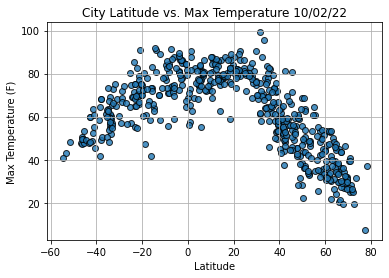

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

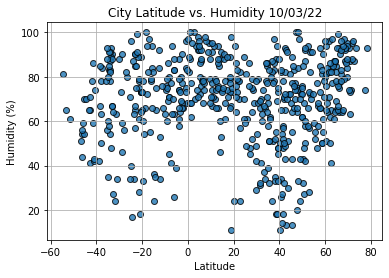

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

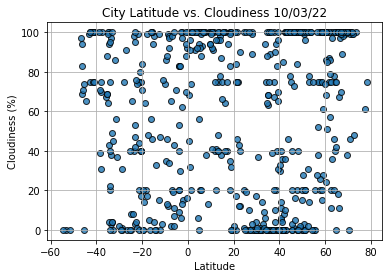

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

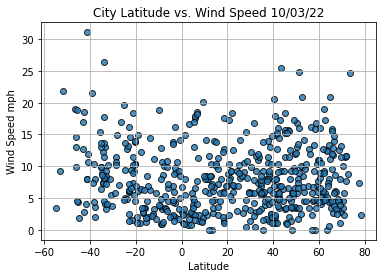

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()